# Confronto tra Insertion Sort e Counting Sort
## Matteo Lotti
### Marzo-Aprile 2023

In questo notebook ci poniamo l'obiettivo di impostare e effettuare un confronto tra due algoritmi di ordinamento. In particolare, i due algoritmi in questione saranno:

- __Insertion Sort__

- __Counting Sort__

Il notebook sarà sviluppato in questo modo:

1. Nelle celle successive saranno presenti le implementazioni dei due algoritmi seguiti rispettivamente da una breve spiegazione messa in relazione con le evidenze teoriche conosciute.

2. Successivamente sarà presente una cella nella quale sarà implementata la funzione di test, seguita da un'opportuna spiegazione del codice e dei test che saranno eseguiti

3. Saranno effettuati e descritti i dovuti test e i rispettivi risultati

4. Nella chiusura tireremo le somme dei risultati ottenuti dagli esperimenti svolti

## Implementazioni degli algoritmi
### Insertion Sort

In [1]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

Nella cella sovrastante possiamo vedere l'implementazione dell'algoritmo di ordinamento __Insertion Sort__. L'algoritmo si basa su un ciclo _for_ iniziale nel quale si inizializza la variabile _key_ con il valore all'indice _i_ dell'array da ordinare. All'interno del _for_ un ciclo _while_ ci permette di iterare sugli elementi precedenti a _key_ in modo tale da posizionare il valore di _key_ nella posizione corretta. Al termine di ogni esecuzione del ciclo _for_, i primi _i_ elementi saranno ordinati e quando termina l'algoritmo tutto l'array sarà ordinato correttamente.

### Counting Sort

In [2]:
def counting_sort(arr):
    max_element = max(arr) #k
    count_array = [0] * (max_element + 1) #primo for

    for element in arr:
        count_array[element] += 1

    for i in range(1, len(count_array)):
        count_array[i] += count_array[i-1]

    sorted_array = [0] * len(arr)
    for element in reversed(arr):
        sorted_array[count_array[element]-1] = element #-1 perché indicizzazione parte da 0
        count_array[element] -= 1

    return sorted_array


Nella cella sovrastante troviamo l'algoritmo di ordinamento __Counting Sort__. Sottlineamo il fatto che questo algoritmi è utilizzabile solo per liste di numeri interi. Non è un algoritmo che opera per confronti, ma si basa sul determinare la posizione di ogni elemento nell'array ordinato in base a quanti sono gli elementi minori o uguali ad esso. In particolare, è necessario un array di appoggio di dimensione _max_element_, dove _max_element_ non è altro che il valore massimo presente nell'array di partenza. Successivamente, dopo aver inzializzato quest'array con tutti 0, incrementiamo di 1 l'elemento di indice _i_ per ogni elemento uguale a _i_ nell'array iniziale; poi scorriamo l'array di appoggio sommando ad ogni elemento tutti gli elementi ad esso precedenti. Quello che otteniamo dopo queste due operazioni non è altro che un array di appoggio in cui l'elemento di indice _x_ ha come valore il numero di elementi minori o uguali a _x_ nell'array iniziale. L'ultimo passaggio è quello di copiare su un nuovo array gli elementi ordinati, considerando che nell'array di appoggio l'elemento con indice _x_ risulta essere la posizione di _x_ nell'array ordinato. Decrementando poi progressivamente i valori dell'array di appoggio si riescono a gestire anche ventuali copie multiple di uno stesso valore.

## Implementazione e spiegazione dei test

In [3]:
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import numpy as np

def test(rand, n, r, s, ins, cou, title, rev = False):

    insertion_sort_times = []
    counting_sort_times = []


    i=s

    while i<n:
        if rand:
            arr = [random.randint(0, r) for _ in range(i)]
        else:
            arr = np.arange(i)
        if rev:
            arr = arr[::-1]

        arr2 = np.copy(arr)

        start = timer()
        insertion_sort(arr) #probably not necessary
        end = timer()
        insertion_sort_times.append(end-start)

        start = timer()
        counting_sort(arr2)
        end = timer()
        counting_sort_times.append(end-start)


    
        i+=s

    if ins:
        plt.plot(range(s,n,s), insertion_sort_times, label="Insertion Sort")
    if cou:
        plt.plot(range(s,n,s), counting_sort_times, label="Counting Sort")
    plt.xlabel("Input Size")
    plt.ylabel("Time (seconds)")
    plt.title(title)
    plt.legend()
    plt.show()


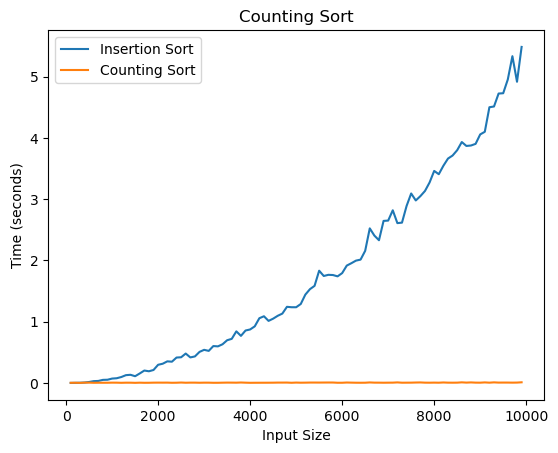

In [4]:
test(True, 10000, 10000, 100, True, True, "Counting Sort") #può aver senso